## Impact of Word Count

3 other dimensions:

->Font size = 18

->Blur Level = 0

->Background Color = white

3 word counts: 40-60, 110-130, 180-200

30 base images per word count


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from nltk.translate.bleu_score import sentence_bleu


In [45]:

file_path = 'urdu_inferenced_dataset_with_metrics.csv'
df = pd.read_csv(file_path)

# Define the base conditions
base_font_size = 18
base_blur_level = 0
base_background_color = 'white'

# Filter entries for specific word counts with base features
filtered_df = df[
    ((df['Word Count Range'] == '40-60') | (df['Word Count Range'] == '110-130') | (df['Word Count Range'] == '180-200')) &
    (df['Font Size'] == base_font_size) &
    (df['Blur Level'] == base_blur_level) &
    (df['Background Color'] == base_background_color)
]






## Word Count Dataset Functions

In [46]:
# Function to filter data for word count analysis
def filter_word_count_data(df, base_font_size, base_blur_level, base_background_color, word_count_order):
    filtered_df = df[
        (df['Font Size'] == base_font_size) &
        (df['Blur Level'] == base_blur_level) &
        (df['Background Color'] == base_background_color) &
        (df['Word Count Range'].isin(word_count_order))
    ]
    return filtered_df

# Function to analyze word count impact on WER
def analyze_word_count_impact(df, language_name):
    # Calculate the average WER for each word count group
    avg_wer = df.groupby('Word Count Range')['WER'].mean().reset_index()
    
    # Ensure the correct order of word count ranges
    word_count_order = ['40-60', '110-130', '180-200']
    avg_wer['Word Count Range'] = pd.Categorical(avg_wer['Word Count Range'], categories=word_count_order, ordered=True)
    avg_wer = avg_wer.sort_values('Word Count Range')

    # Map word count ranges to their midpoints for better visualization
    word_count_mapping = {'40-60': 50, '110-130': 120, '180-200': 190}
    avg_wer['word_count_numeric'] = avg_wer['Word Count Range'].map(word_count_mapping)

    # Plot the average WER for each word count
    plt.figure(figsize=(10, 6))
    plt.bar(avg_wer['word_count_numeric'], avg_wer['WER'], width=15, color='skyblue', edgecolor='black')
    plt.title(f'Average WER vs Word Count ({language_name})', fontsize=16)
    plt.xlabel('Word Count', fontsize=14)
    plt.ylabel('Average WER', fontsize=14)
    plt.xticks(avg_wer['word_count_numeric'], labels=word_count_order)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## URDU Evaluation

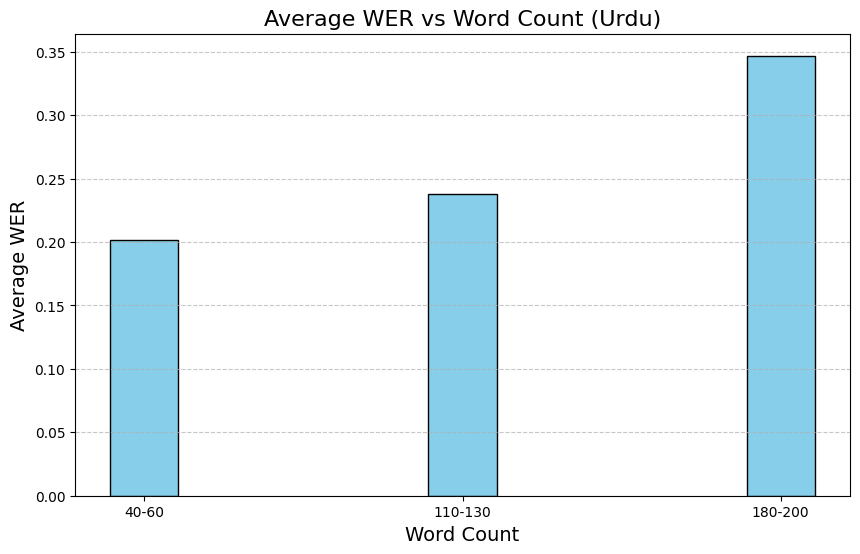

In [47]:
# File path
urdu_file_path = 'urdu_inferenced_dataset_with_metrics.csv'
urdu_df = pd.read_csv(urdu_file_path)

# Define filtering conditions
base_font_size = 18
base_blur_level = 0
base_background_color = 'white'
word_count_order = ['40-60', '110-130', '180-200']

# Filter the data
filtered_urdu_df = filter_word_count_data(urdu_df, base_font_size, base_blur_level, base_background_color, word_count_order)

# Analyze word count impact on WER
analyze_word_count_impact(filtered_urdu_df, "Urdu")


## ENGLISH Evaluation

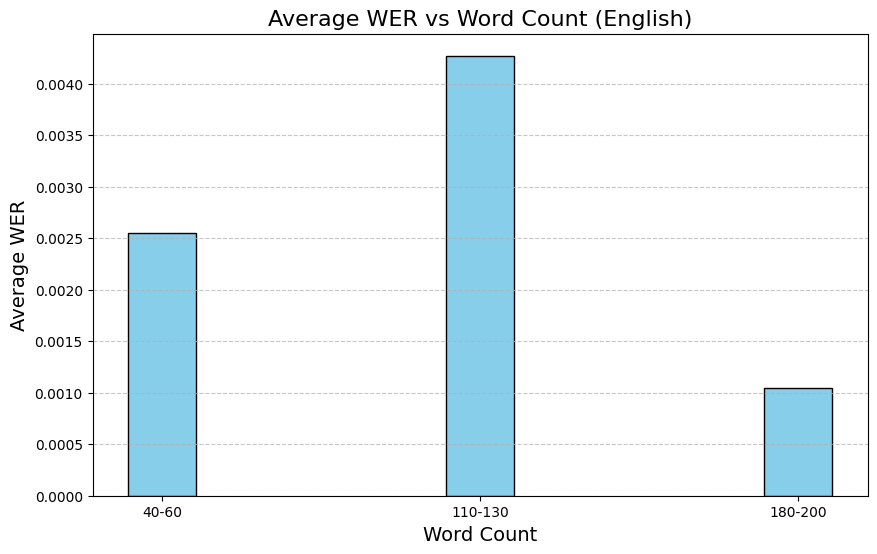

In [48]:
# File path
english_file_path = 'english_inferenced_dataset_with_metrics.csv'
english_df = pd.read_csv(english_file_path)

# Filter the data
filtered_english_df = filter_word_count_data(english_df, base_font_size, base_blur_level, base_background_color, word_count_order)

# Analyze word count impact on WER
analyze_word_count_impact(filtered_english_df, "English")


## TAJIK Evaluation

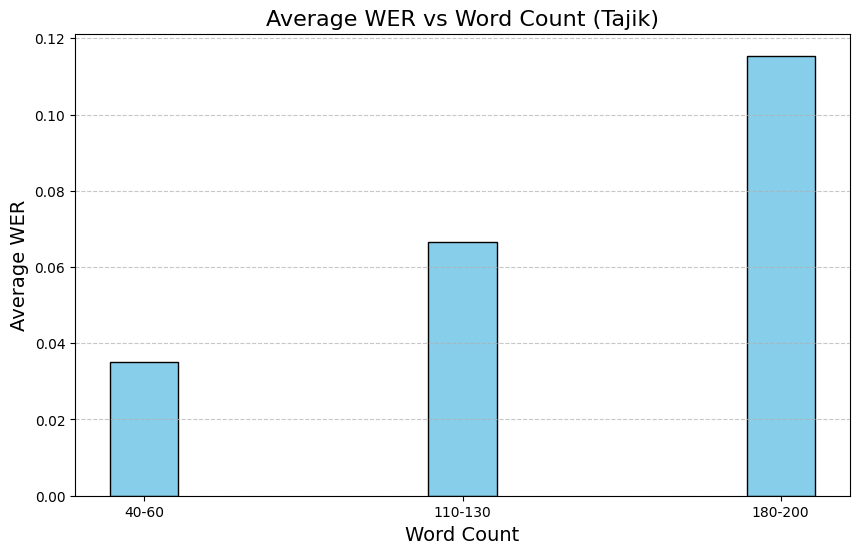

In [49]:
# File path
tajik_file_path = 'tajik_inferenced_dataset_with_metrics.csv'
tajik_df = pd.read_csv(tajik_file_path)

# Filter the data
filtered_tajik_df = filter_word_count_data(tajik_df, base_font_size, base_blur_level, base_background_color, word_count_order)

# Analyze word count impact on WER
analyze_word_count_impact(filtered_tajik_df, "Tajik")


## ALBANIAN Evaluation

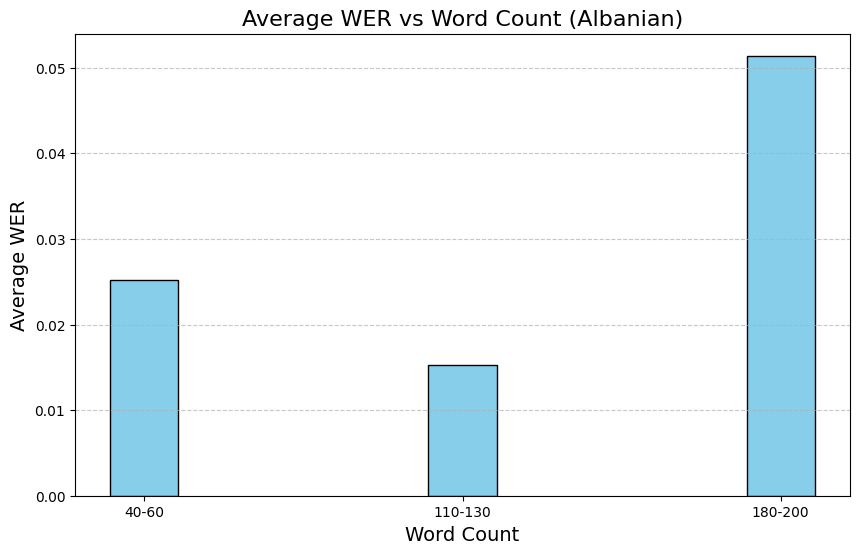

In [50]:
# File path
albanian_file_path = 'albanian_inferenced_dataset_with_metrics.csv'
albanian_df = pd.read_csv(albanian_file_path)

# Filter the data
filtered_albanian_df = filter_word_count_data(albanian_df, base_font_size, base_blur_level, base_background_color, word_count_order)

# Analyze word count impact on WER
analyze_word_count_impact(filtered_albanian_df, "Albanian")


## Combining Results

In [51]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results = []

# Helper function to append results to the combined list
def append_language_results_word_count(filtered_df, language_name):
    avg_wer = filtered_df.groupby('Word Count Range')['WER'].mean().reset_index()
    avg_wer['Language'] = language_name
    combined_results.append(avg_wer)

# Append results for all languages
append_language_results_word_count(filtered_urdu_df, "Urdu")
append_language_results_word_count(filtered_tajik_df, "Tajik")
append_language_results_word_count(filtered_albanian_df, "Albanian")
append_language_results_word_count(filtered_english_df, "English")


# Combine into a single DataFrame
combined_word_count_df = pd.concat(combined_results, ignore_index=True)
print("Combined results DataFrame for Word Count created.")


Combined results DataFrame for Word Count created.


## Grouped Bar Plots 

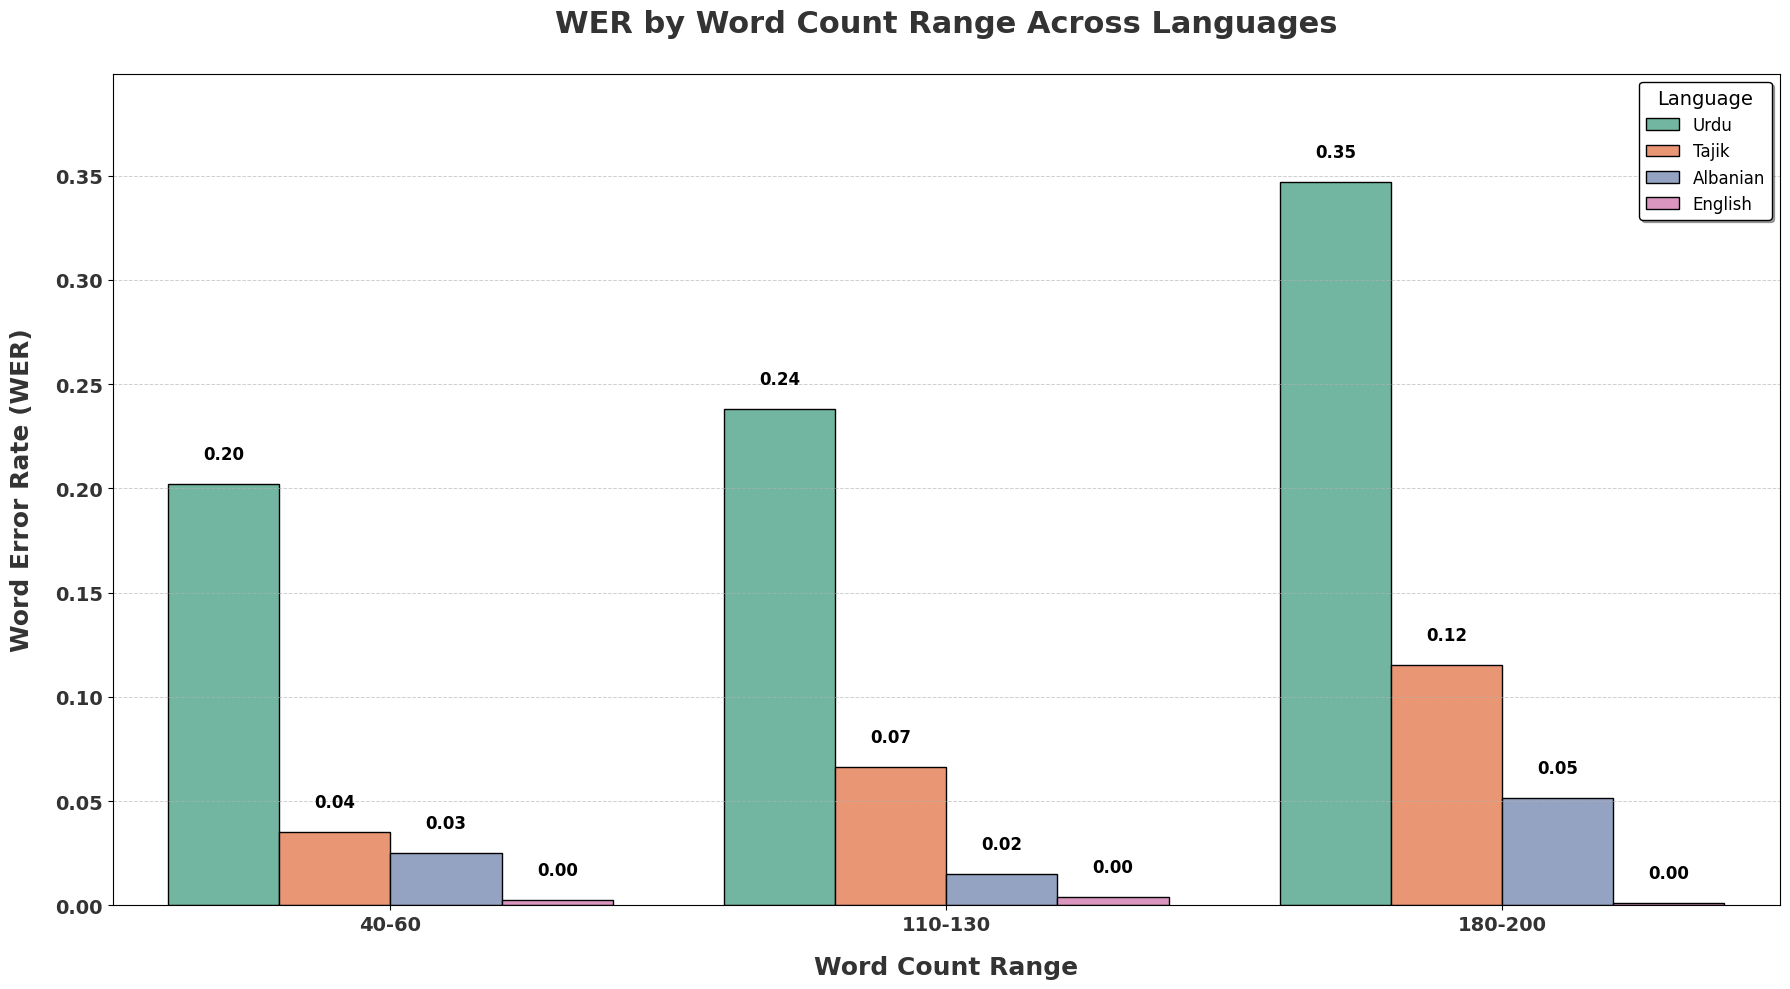

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Grouped Bar Plot for WER by Word Count Range
def plot_grouped_bar_wer_word_count(df, word_count_order):
    plt.figure(figsize=(18, 10))  # Larger figure size for better presentation

    # Create the bar plot
    sns.barplot(
        data=df,
        x='Word Count Range',
        y='WER',
        hue='Language',
        ci=None,
        palette=sns.color_palette("Set2", len(df['Language'].unique())),
        order=word_count_order,
        edgecolor='black'  # Add sharp bar outlines
    )
    
    # Add annotations above each bar
    for bar in plt.gca().patches:
        bar_height = bar.get_height()
        bar_width = bar.get_width()
        bar_x = bar.get_x()
        if bar_height > 0:
            plt.text(
                bar_x + bar_width / 2,
                bar_height + 0.01,
                f'{bar_height:.2f}',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                color='black'
            )
    
    # Customize the title and axis labels
    plt.title(
        'WER by Word Count Range Across Languages',
        fontsize=22,
        fontweight='bold',
        pad=30,
        color='#333333'
    )
    plt.xlabel('Word Count Range', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    
    # Customize the legend
    plt.legend(
        title='Language',
        title_fontsize=14,
        fontsize=12,
        loc='upper right',
        frameon=True,
        facecolor='white',
        edgecolor='black',
        fancybox=True,
        shadow=True
    )
    
    # Add gridlines with a clean look
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.xticks(fontsize=14, fontweight='bold', color='#333333')
    plt.yticks(fontsize=14, fontweight='bold', color='#333333')
    plt.ylim(0, df['WER'].max() * 1.15)
    plt.tight_layout()
    plt.show()

# Call the function for WER
plot_grouped_bar_wer_word_count(combined_word_count_df, word_count_order)


## Line Plot

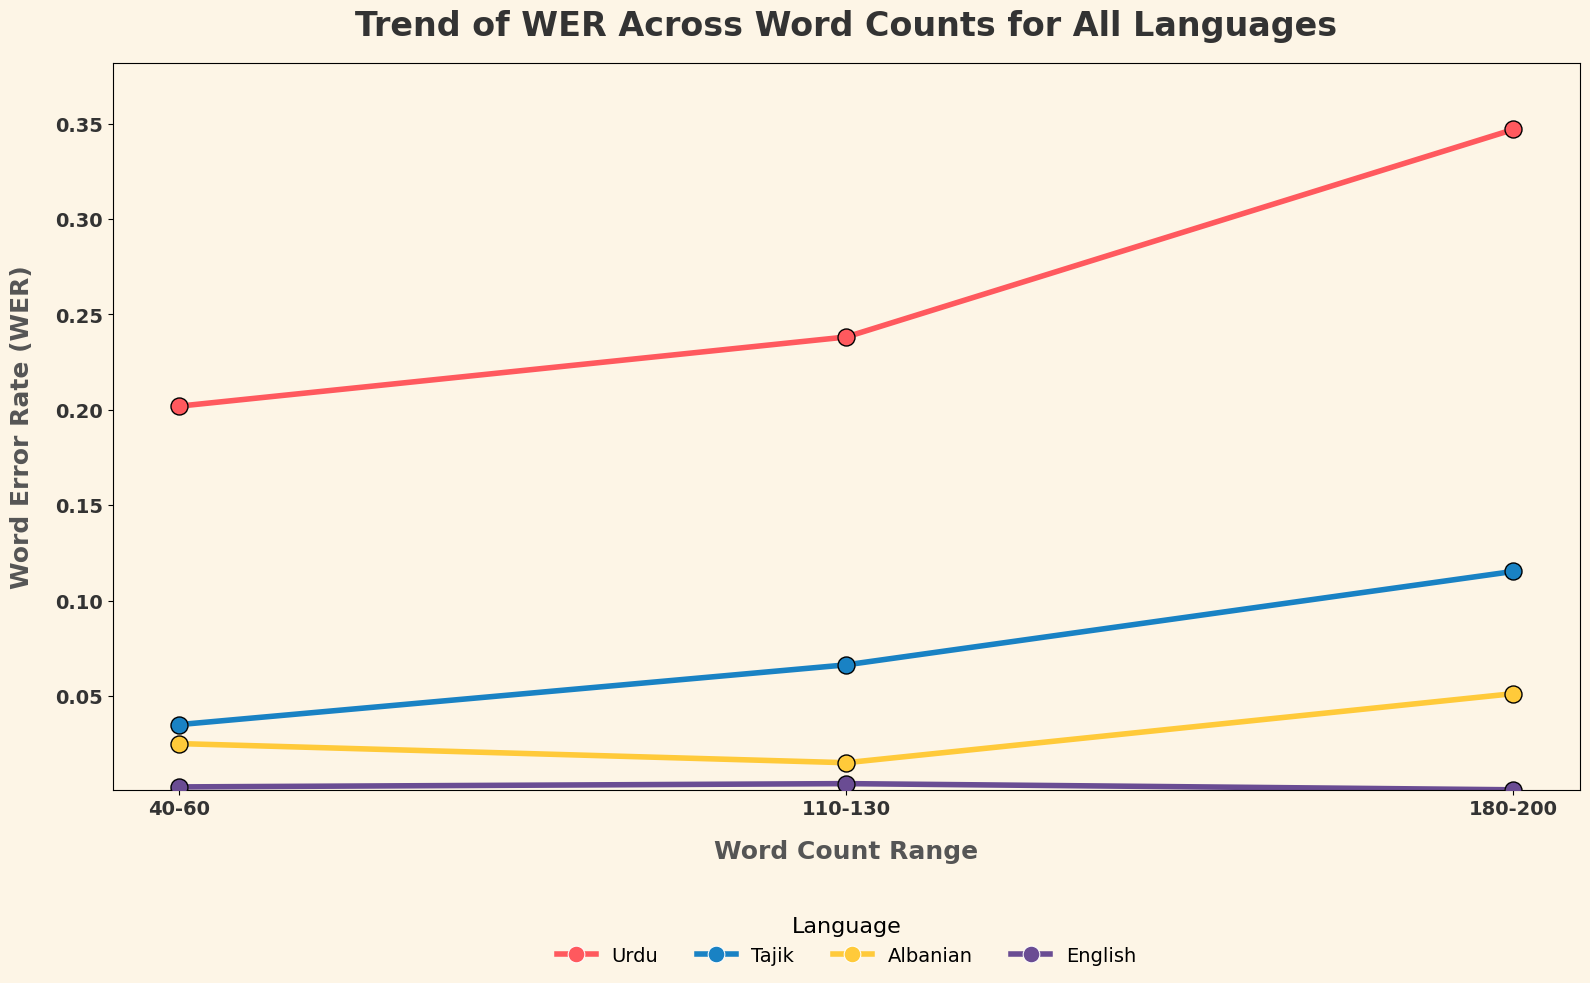

In [99]:
# Enhanced Line Plot for WER Trends Across Word Counts
def plot_line_wer_word_count_infographic(df, word_count_order):
    plt.figure(figsize=(16, 10))  # Larger figure for infographic presentation

    # Sort the data by Word Count Range for correct plotting
    df['Word Count Range'] = pd.Categorical(df['Word Count Range'], categories=word_count_order, ordered=True)
    sorted_df = df.sort_values(by='Word Count Range')

    # Create the line plot
    sns.lineplot(
        data=sorted_df,
        x='Word Count Range',
        y='WER',
        hue='Language',
        marker='o',
        palette=['#FF595E', '#1982C4', '#FFCA3A', '#6A4C93'],  # Vibrant and distinct colors
        linewidth=4,  # Thicker lines
        markersize=12  # Larger markers
    )

    # Customize title and labels
    plt.title(
        'Trend of WER Across Word Counts for All Languages',
        fontsize=24,
        fontweight='bold',
        color='#333333',
        pad=20
    )
    plt.xlabel('Word Count Range', fontsize=18, labelpad=15, fontweight='bold', color='#555555')
    plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#555555')

    # Enhance legend
    plt.legend(
        title='Language',
        title_fontsize=16,
        fontsize=14,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),  # Place below the plot
        frameon=False,
        ncol=4  # Arrange in a single row
    )

    # Remove gridlines for a cleaner look
    plt.grid(False)

    # Customize the background
    plt.gca().set_facecolor('#FDF5E6')  # Light beige background
    plt.gcf().patch.set_facecolor('#FDF5E6')  # Match figure background

    # Add markers for each point with a contrasting black edge
    for line in plt.gca().lines:
        x_data, y_data = line.get_xdata(), line.get_ydata()
        plt.scatter(
            x_data, y_data,
            color=line.get_color(),
            s=150,  # Larger marker size for infographic look
            edgecolor='black',
            zorder=3
        )

    # Dynamically scale the y-axis to fit the data properly
    y_min = sorted_df['WER'].min() * 0.9  # Add a small buffer below the minimum
    y_max = sorted_df['WER'].max() * 1.1  # Add a small buffer above the maximum
    plt.ylim(y_min, y_max)

    # Simplify the x and y ticks
    plt.xticks(fontsize=14, fontweight='bold', color='#333333')
    plt.yticks(fontsize=14, fontweight='bold', color='#333333')

    plt.tight_layout()
    plt.show()

# Call the function for WER trends across Word Counts
plot_line_wer_word_count_infographic(combined_word_count_df, word_count_order)


## Radar Plot

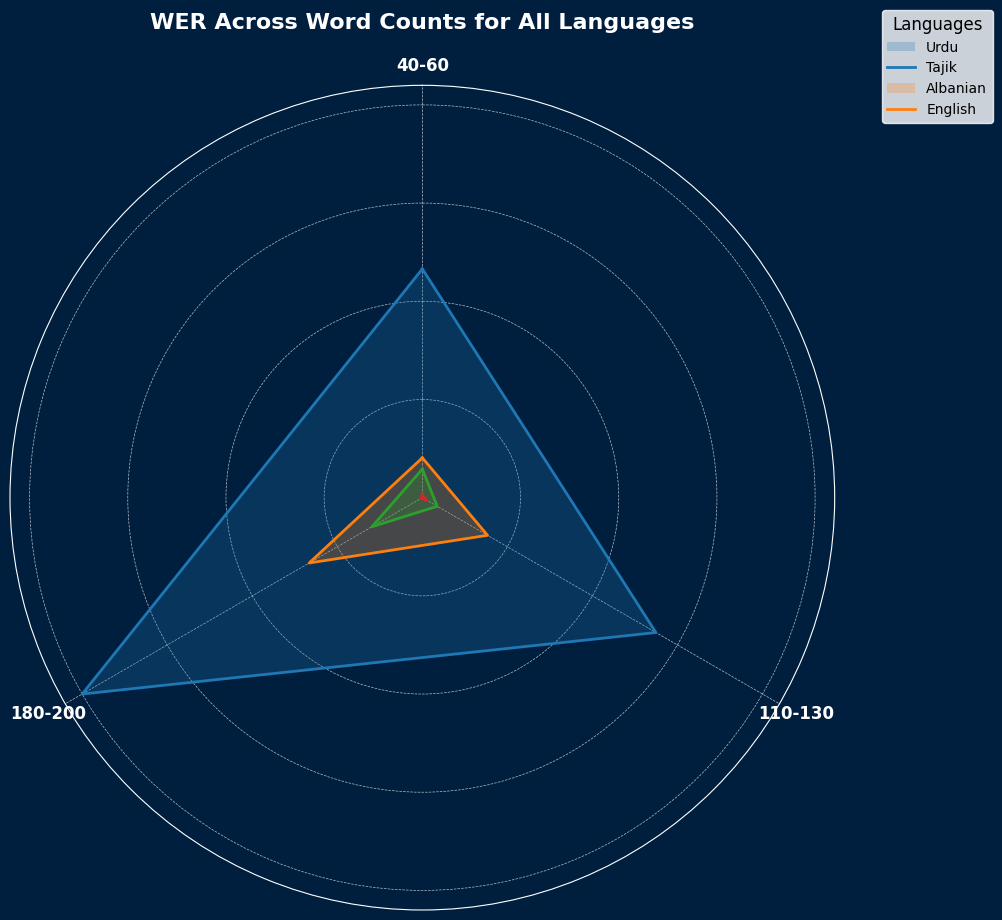

In [95]:
from math import pi
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for radar plot
def prepare_radar_data_word_count(df, word_count_order):
    radar_data = {}
    for language in df['Language'].unique():
        lang_data = df[df['Language'] == language]
        radar_data[language] = [lang_data[lang_data['Word Count Range'] == wc]['WER'].mean() for wc in word_count_order]
    radar_data['Metric'] = word_count_order
    return pd.DataFrame(radar_data)

# Assuming 'combined_word_count_df' and 'word_count_order' are defined
radar_word_count_df = prepare_radar_data_word_count(combined_word_count_df, word_count_order)

# Enhanced radar plot with the desired style
def plot_radar(data, title):
    categories = list(data['Metric'])
    num_vars = len(categories)

    # Create figure and axis
    fig = plt.figure(figsize=(10, 10), facecolor='#001f3f')  # Dark blue figure background
    ax = fig.add_subplot(111, polar=True)

    # Create the angle for each category
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Define colormap and transparency
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Vibrant colors
    fill_colors = [to_rgba(c, alpha=0.25) for c in colors]  # Transparent fills

    # Draw radar chart for each language
    for i, language in enumerate(data.columns[:-1]):  # Exclude 'Metric'
        values = data[language].tolist()
        values += values[:1]  # Complete the circle

        # Add transparent fill
        ax.fill(angles, values, color=fill_colors[i], edgecolor='none', zorder=2)
        # Add bold outline
        ax.plot(angles, values, linewidth=2, color=colors[i], zorder=3, label=language)

    # Add gridlines and radial settings
    ax.set_facecolor('#001f3f')  # Match axis background to the figure
    ax.grid(color='#ffffff', linestyle='--', linewidth=0.5, alpha=0.7)  # Thin white grid lines
    ax.set_theta_offset(pi / 2)  # Rotate start angle to top
    ax.set_theta_direction(-1)  # Clockwise layout

    # Configure category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='white', fontweight='bold')

    # Add radial lines and limits
    ax.set_yticks(np.linspace(0, max(data.iloc[:, :-1].max()), 5))
    ax.set_yticklabels([], color='white')  # Hide radial labels
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Add title
    ax.set_title(title, size=16, pad=20, color='white', fontweight='bold')

    # Add a legend
    ax.legend(data.columns[:-1], loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, title="Languages",
              title_fontsize=12, facecolor='white', edgecolor='white', labelspacing=0.5)

    plt.tight_layout()
    plt.show()

# Radar plot for Word Count vs WER
plot_radar(radar_word_count_df, 'WER Across Word Counts for All Languages')


## BLEU SCORE 

In [88]:
from nltk.translate.bleu_score import sentence_bleu

# Function to calculate BLEU score for a dataset
def calculate_bleu(df):
    bleu_scores = []
    for _, row in df.iterrows():
        reference = [str(row['Gold Label']).split()]  # Tokenized reference (ground truth)
        hypothesis = str(row['Response']).split()    # Tokenized hypothesis (OCR output)
        bleu = sentence_bleu(reference, hypothesis)
        bleu_scores.append(bleu)
    df['BLEU'] = bleu_scores
    return df


# Calculate BLEU for each dataset
urdu_bleu_df = calculate_bleu(filtered_urdu_df)
english_bleu_df = calculate_bleu(filtered_english_df)
tajik_bleu_df = calculate_bleu(filtered_tajik_df)
albanian_bleu_df = calculate_bleu(filtered_albanian_df)

# Combine BLEU results for grouped analysis
bleu_combined_results = []

def append_bleu_results(df, language_name):
    avg_bleu = df.groupby('Word Count Range')['BLEU'].mean().reset_index()
    avg_bleu['Language'] = language_name
    bleu_combined_results.append(avg_bleu)

# Append results for all languages
append_bleu_results(urdu_bleu_df, "Urdu")
append_bleu_results(tajik_bleu_df, "Tajik")
append_bleu_results(albanian_bleu_df, "Albanian")
append_bleu_results(english_bleu_df, "English")


# Combine BLEU results into a single DataFrame
bleu_combined_df = pd.concat(bleu_combined_results, ignore_index=True)







## BLEU Score Grouped Bar Plots

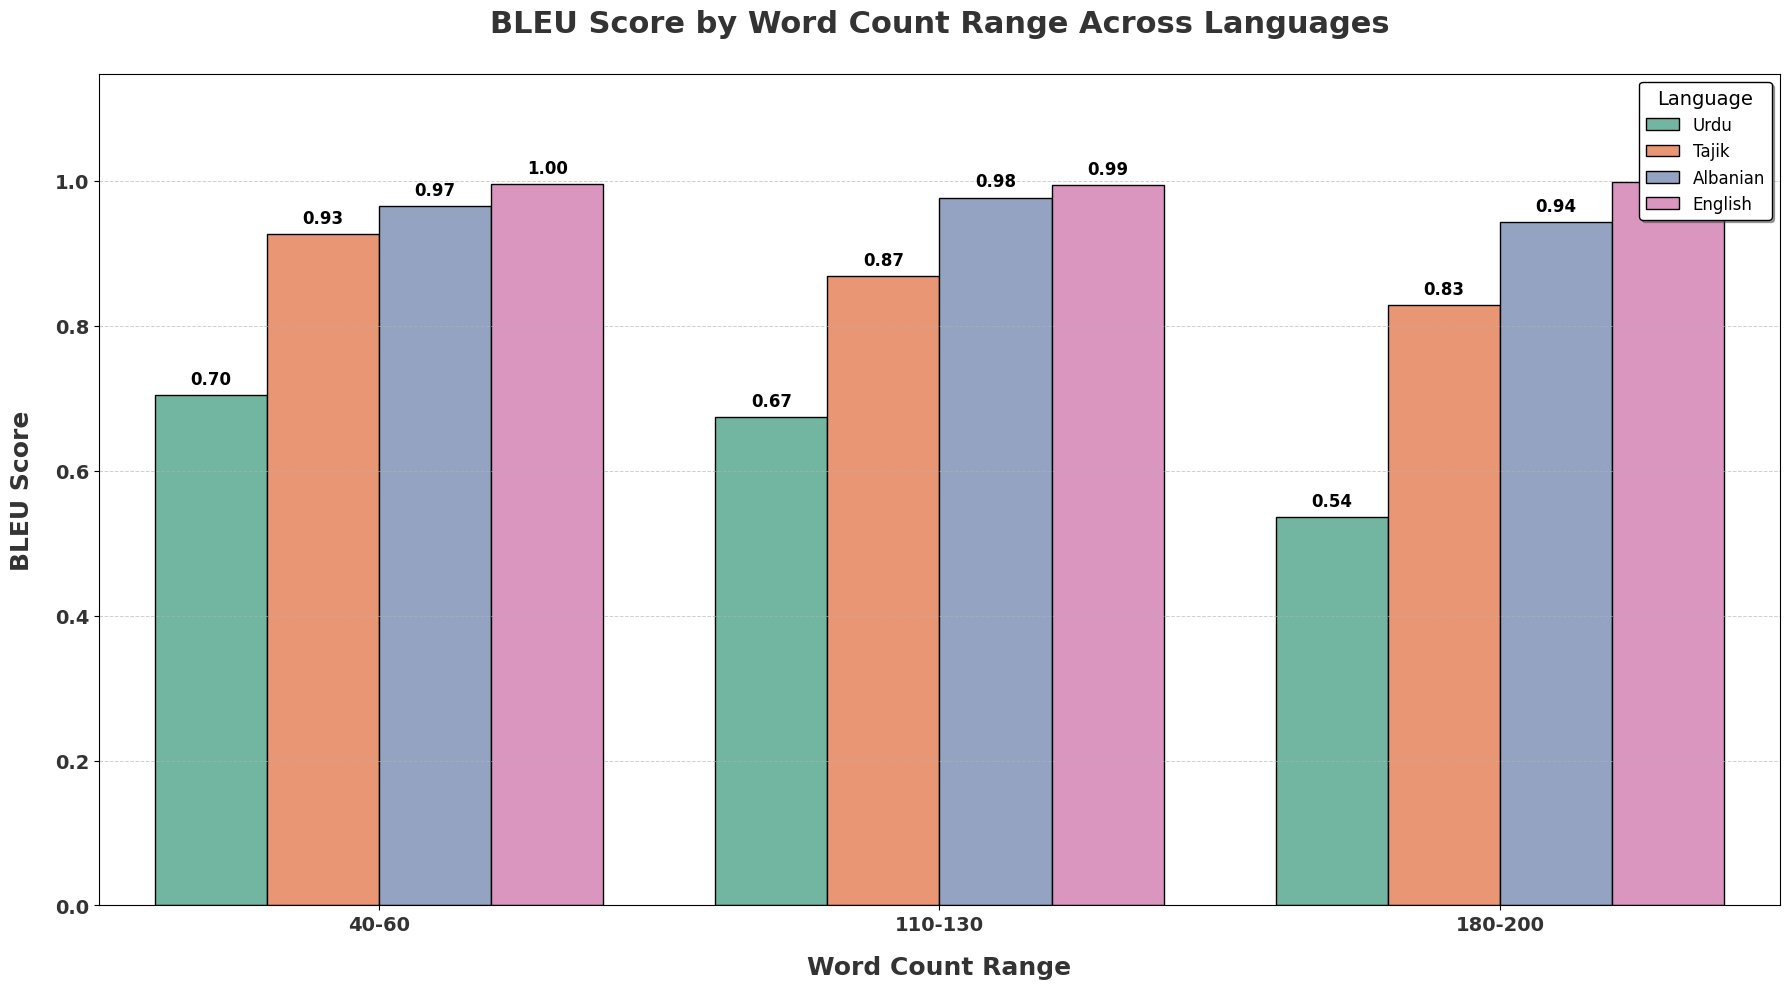

In [97]:
# Grouped Bar Plot for BLEU Score by Word Count Range
def plot_grouped_bar_bleu_word_count(df, word_count_order):
    plt.figure(figsize=(18, 10))

    # Create the bar plot
    sns.barplot(
        data=df,
        x='Word Count Range',
        y='BLEU',
        hue='Language',
        ci=None,
        palette=sns.color_palette("Set2", len(df['Language'].unique())),
        order=word_count_order,
        edgecolor='black'
    )
    
    # Add annotations above each bar
    for bar in plt.gca().patches:
        bar_height = bar.get_height()
        bar_width = bar.get_width()
        bar_x = bar.get_x()
        if bar_height > 0:
            plt.text(
                bar_x + bar_width / 2,
                bar_height + 0.01,
                f'{bar_height:.2f}',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                color='black'
            )
    
    # Customize the title and axis labels
    plt.title(
        'BLEU Score by Word Count Range Across Languages',
        fontsize=22,
        fontweight='bold',
        pad=30,
        color='#333333'
    )
    plt.xlabel('Word Count Range', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    plt.ylabel('BLEU Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    
    # Customize the legend
    plt.legend(
        title='Language',
        title_fontsize=14,
        fontsize=12,
        loc='upper right',
        frameon=True,
        facecolor='white',
        edgecolor='black',
        fancybox=True,
        shadow=True
    )
    
    # Add gridlines with a clean look
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.xticks(fontsize=14, fontweight='bold', color='#333333')
    plt.yticks(fontsize=14, fontweight='bold', color='#333333')
    plt.ylim(0, df['BLEU'].max() * 1.15)
    plt.tight_layout()
    plt.show()

# Call the function for BLEU
plot_grouped_bar_bleu_word_count(bleu_combined_df, word_count_order)


## BLEU Score HeatMap

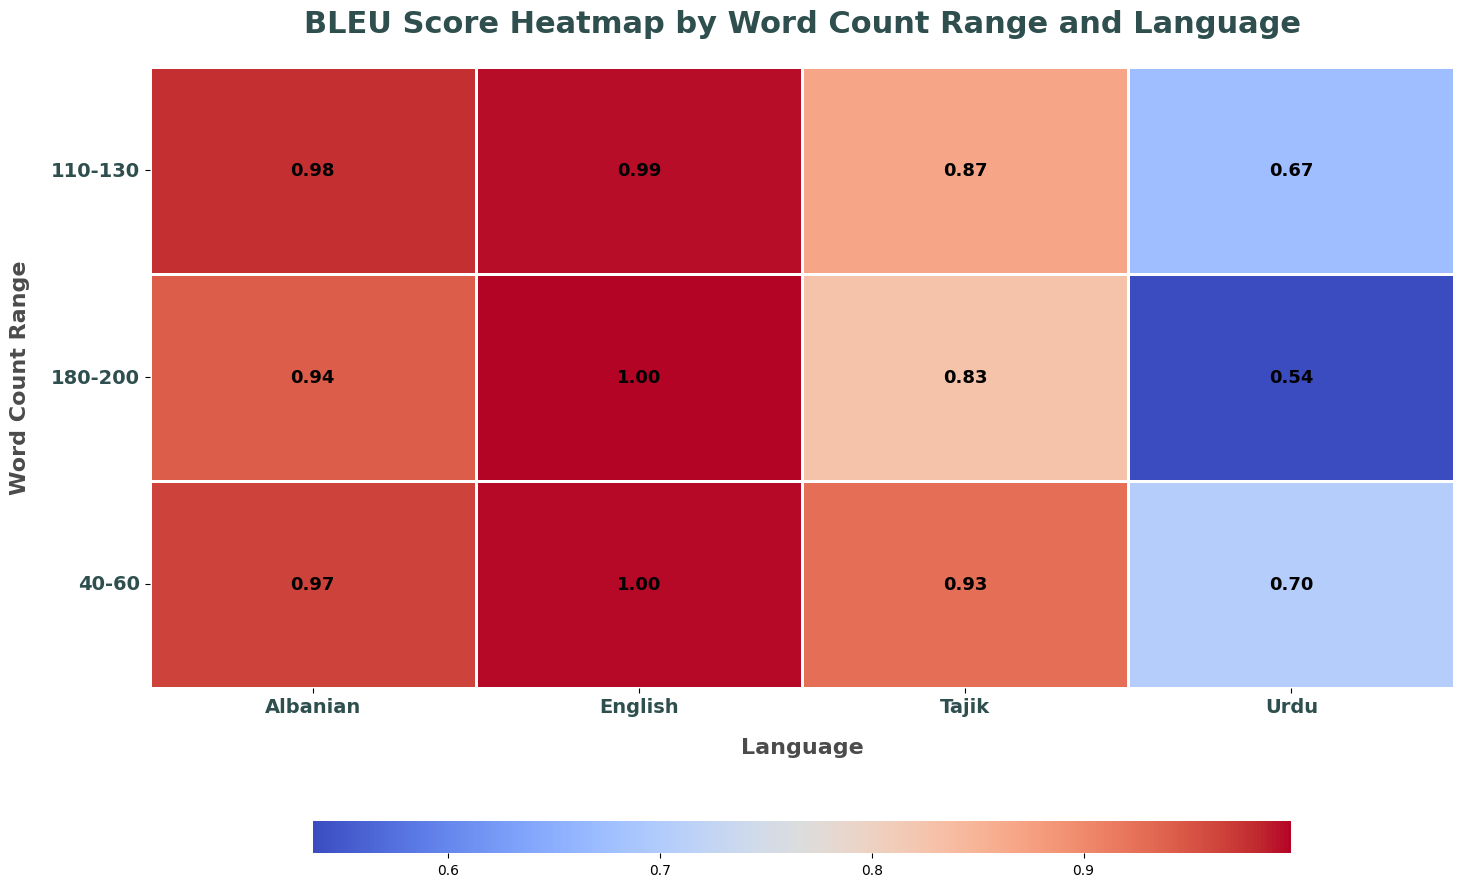

In [101]:
# Sleek Heatmap for BLEU Scores by Word Count Range
def plot_heatmap_bleu_word_count(df):
    # Create a pivot table for the heatmap
    heatmap_data = df.pivot_table(index='Word Count Range', columns='Language', values='BLEU')

    # Create the figure and plot heatmap
    plt.figure(figsize=(15, 10))  # Larger size for emphasis
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",  # Sleek, contrasting colormap
        annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
        linewidths=2,  # Thicker cell dividers
        linecolor='white',  # White gridlines for a clean appearance
        cbar_kws={
            "orientation": "horizontal",  # Horizontal color bar for a modern look
            "shrink": 0.75,
            "aspect": 30,
            "pad": 0.15,  # Adjust spacing from the plot
            "ticks": None
        }
    )

    # Add a sleek title and labels
    plt.title(
        'BLEU Score Heatmap by Word Count Range and Language',
        fontsize=22,
        fontweight='bold',
        pad=25,
        color='#2f4f4f'  # Dark grayish-green for a modern feel
    )
    plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
    plt.ylabel('Word Count Range', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

    # Customize x and y ticks
    plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
    plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

    # Adjust layout for visual balance
    plt.tight_layout(pad=2.0)
    plt.show()

# Call the function for BLEU heatmap
plot_heatmap_bleu_word_count(bleu_combined_df)


## F1 Score

In [91]:
# Function to calculate F1-scores for word count analysis
def calculate_f1_scores(df):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _, row in df.iterrows():
        # Tokenize ground truth and response
        reference = str(row['Gold Label']).split()
        hypothesis = str(row['Response']).split()

        # Calculate matches and mismatches
        true_positives = len(set(reference) & set(hypothesis))  # Correctly recognized words
        false_positives = len(set(hypothesis) - set(reference))  # Extra words in hypothesis
        false_negatives = len(set(reference) - set(hypothesis))  # Missing words in hypothesis

        # Avoid division by zero
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Add to DataFrame
    df['Precision'] = precision_scores
    df['Recall'] = recall_scores
    df['F1-Score'] = f1_scores
    return df

# Calculate F1-scores for each dataset
urdu_f1_df = calculate_f1_scores(filtered_urdu_df)
english_f1_df = calculate_f1_scores(filtered_english_df)
tajik_f1_df = calculate_f1_scores(filtered_tajik_df)
albanian_f1_df = calculate_f1_scores(filtered_albanian_df)



In [92]:
# Combine F1-score results for grouped analysis
f1_combined_results = []

def append_f1_results_word_count(df, word_count_order, language_name):
    avg_f1 = df.groupby('Word Count Range')['F1-Score'].mean().reset_index()
    avg_f1['Language'] = language_name
    f1_combined_results.append(avg_f1)

# Append F1 results for all languages
append_f1_results_word_count(urdu_f1_df, word_count_order, "Urdu")
append_f1_results_word_count(tajik_f1_df, word_count_order, "Tajik")
append_f1_results_word_count(albanian_f1_df, word_count_order, "Albanian")
append_f1_results_word_count(english_f1_df, word_count_order, "English")


# Combine into a single DataFrame
f1_combined_word_count_df = pd.concat(f1_combined_results, ignore_index=True)
print("Combined F1-score results DataFrame for Word Count created.")



Combined F1-score results DataFrame for Word Count created.


## F1 Score Grouped Bar Plot

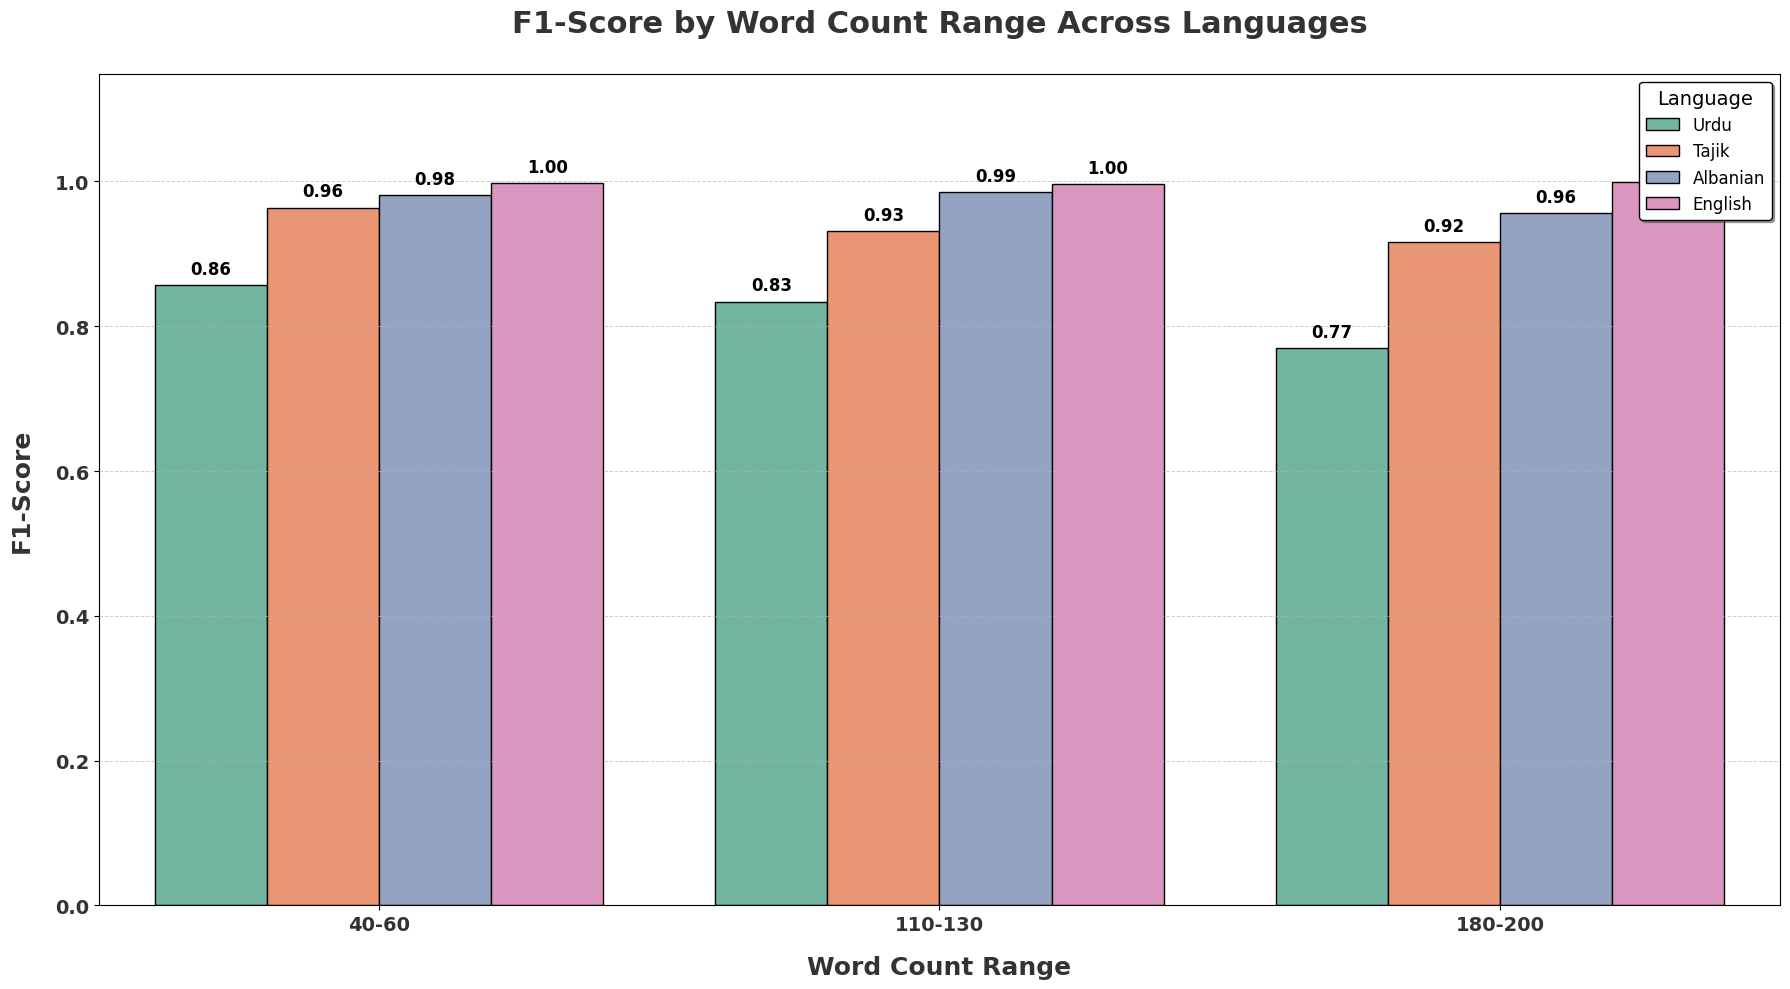

In [98]:
# Grouped Bar Plot for F1-Score by Word Count Range
def plot_grouped_bar_f1_word_count(df, word_count_order):
    plt.figure(figsize=(18, 10))

    # Create the bar plot
    sns.barplot(
        data=df,
        x='Word Count Range',
        y='F1-Score',
        hue='Language',
        ci=None,
        palette=sns.color_palette("Set2", len(df['Language'].unique())),
        order=word_count_order,
        edgecolor='black'
    )
    
    # Add annotations above each bar
    for bar in plt.gca().patches:
        bar_height = bar.get_height()
        bar_width = bar.get_width()
        bar_x = bar.get_x()
        if bar_height > 0:
            plt.text(
                bar_x + bar_width / 2,
                bar_height + 0.01,
                f'{bar_height:.2f}',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                color='black'
            )
    
    # Customize the title and axis labels
    plt.title(
        'F1-Score by Word Count Range Across Languages',
        fontsize=22,
        fontweight='bold',
        pad=30,
        color='#333333'
    )
    plt.xlabel('Word Count Range', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    plt.ylabel('F1-Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
    
    # Customize the legend
    plt.legend(
        title='Language',
        title_fontsize=14,
        fontsize=12,
        loc='upper right',
        frameon=True,
        facecolor='white',
        edgecolor='black',
        fancybox=True,
        shadow=True
    )
    
    # Add gridlines with a clean look
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.xticks(fontsize=14, fontweight='bold', color='#333333')
    plt.yticks(fontsize=14, fontweight='bold', color='#333333')
    plt.ylim(0, df['F1-Score'].max() * 1.15)
    plt.tight_layout()
    plt.show()

# Call the function for F1-Score
plot_grouped_bar_f1_word_count(f1_combined_word_count_df, word_count_order)


## F1 Score HeatMap

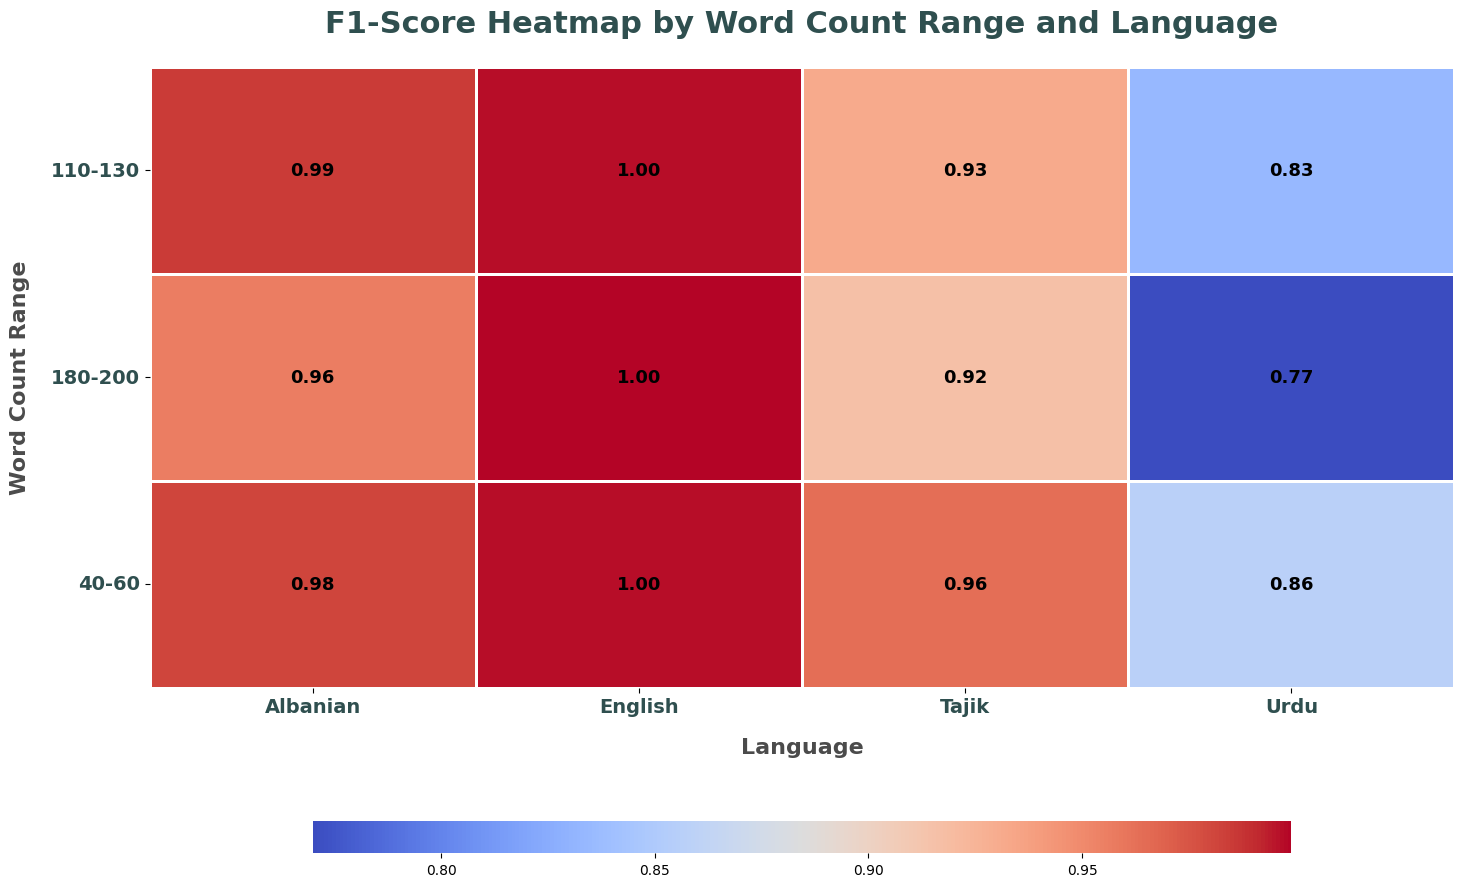

In [102]:
# Sleek Heatmap for F1-Scores by Word Count Range
def plot_heatmap_f1_word_count(df):
    # Create a pivot table for the heatmap
    heatmap_data_f1 = df.pivot_table(index='Word Count Range', columns='Language', values='F1-Score')

    # Create the figure and plot heatmap
    plt.figure(figsize=(15, 10))  # Larger size for emphasis
    sns.heatmap(
        heatmap_data_f1,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",  # Sleek, contrasting colormap
        annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
        linewidths=2,  # Thicker cell dividers
        linecolor='white',  # White gridlines for a clean appearance
        cbar_kws={
            "orientation": "horizontal",  # Horizontal color bar for a modern look
            "shrink": 0.75,
            "aspect": 30,
            "pad": 0.15,  # Adjust spacing from the plot
            "ticks": None
        }
    )

    # Add a sleek title and labels
    plt.title(
        'F1-Score Heatmap by Word Count Range and Language',
        fontsize=22,
        fontweight='bold',
        pad=25,
        color='#2f4f4f'  # Dark grayish-green for a modern feel
    )
    plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
    plt.ylabel('Word Count Range', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

    # Customize x and y ticks
    plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
    plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

    # Adjust layout for visual balance
    plt.tight_layout(pad=2.0)
    plt.show()

# Call the function for F1-Score heatmap
plot_heatmap_f1_word_count(f1_combined_word_count_df)
